In [5]:
import pandas as pd

In [7]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\DS\Internship\Cleaned_merged_data_Dhanshree.csv")

In [9]:
data.tail()

,ActivitySiteID,ActivityDescription,BookingEndDateTime(Day/Month/Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),ClassName,ClassTime
3284,TSC,Zumba 6.30-7.30pm,18/06/2018,06:30 PM,18,9,1299,Zumba,6.30-7.30pm
3285,TSC,Zumba 6.30-7.30pm,25/06/2018,06:30 PM,18,9,1299,Zumba,6.30-7.30pm
3286,TSC,Zumba 6-7pm,07/06/2018,06:00 PM,50,16,1299,Zumba,6-7pm
3287,TSC,Zumba 6-7pm,14/06/2018,06:00 PM,50,13,1299,Zumba,6-7pm
3288,TSC,Zumba 6-7pm,21/06/2018,06:00 PM,50,12,1299,Zumba,6-7pm


In [6]:
data.columns

Index(['ActivitySiteID', 'ActivityDescription',
       'BookingEndDateTime(Day/Month/Year)', 'BookingStartTime', 'MaxBookees',
       'Number Booked', 'Price (INR)', 'ClassName', 'ClassTime'],
      dtype='object')

In [13]:
data.rename (columns={"BookingEndDateTime(Day/Month/Year)":"BookingEndDateTime" },inplace=True)

In [15]:
data['BookingEndDateTime'] =pd.to_datetime(data['BookingEndDateTime'],dayfirst=True)
data.set_index('BookingEndDateTime',inplace=True)

In [17]:
# Now we will see daily bookings

daily_booking =data.resample('D')['Number Booked'].sum()
daily_booking.head(3)

BookingEndDateTime
2018-04-01    223
2018-04-02    296
2018-04-03    973
Freq: D, Name: Number Booked, dtype: int64

In [17]:
pip install prophet 

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.2/13.3 MB 5.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/13.3 MB 6.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/13.3 MB 6.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/13.3 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/13.3 MB 5.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 4.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/13.3 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 4.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.3 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/13.3 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 4.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/13.3 MB 3.8 MB/s eta 0:00:03
   ---

In [19]:
from prophet import Prophet 

In [21]:
prophet_data = daily_booking.reset_index().rename(columns={'BookingEndDateTime':'ds' ,'Number Booked' :'y'})

In [23]:
model =Prophet()
model.fit(prophet_data)

19:39:08 - cmdstanpy - INFO - Chain [1] start processing
19:39:09 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 

In [26]:
# Future dataframe for predictions 
# periods =30 will forecast for next 30 days 
future = model.make_future_dataframe(periods=60) 

In [29]:
forecast = model.predict(future)

In [40]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
146,2018-08-25,524.54457,142.334134,406.178520,524.542718,524.546496,-248.257285,-248.257285,-248.257285,-248.257285,-248.257285,-248.257285,0.0,0.0,0.0,276.287286
147,2018-08-26,523.62305,33.364996,289.272508,523.621148,523.625015,-368.014217,-368.014217,-368.014217,-368.014217,-368.014217,-368.014217,0.0,0.0,0.0,155.608833
148,2018-08-27,522.70153,485.528664,751.711662,522.699585,522.703527,92.288934,92.288934,92.288934,92.288934,92.288934,92.288934,0.0,0.0,0.0,614.990464
149,2018-08-28,521.78001,696.222531,964.291866,521.778023,521.782066,311.978281,311.978281,311.978281,311.978281,311.978281,311.978281,0.0,0.0,0.0,833.758291
150,2018-08-29,520.85849,592.970476,861.079593,520.856464,520.860592,208.284680,208.284680,208.284680,208.284680,208.284680,208.284680,0.0,0.0,0.0,729.143170


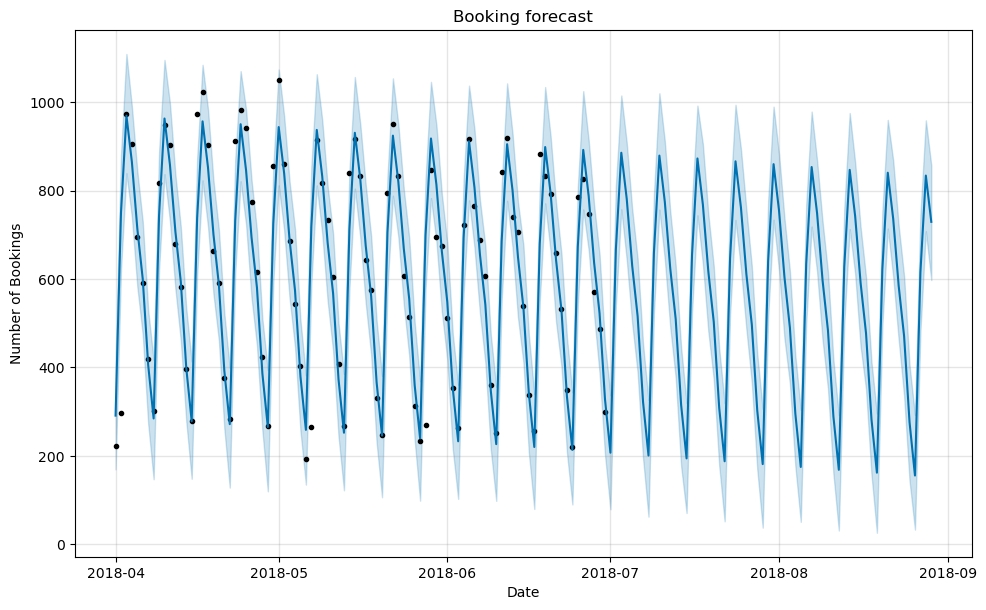

In [26]:
fig =model.plot(forecast)
plt.title("Booking forecast")
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

In [28]:
forecast['yhat'].sum()

89330.32989752252

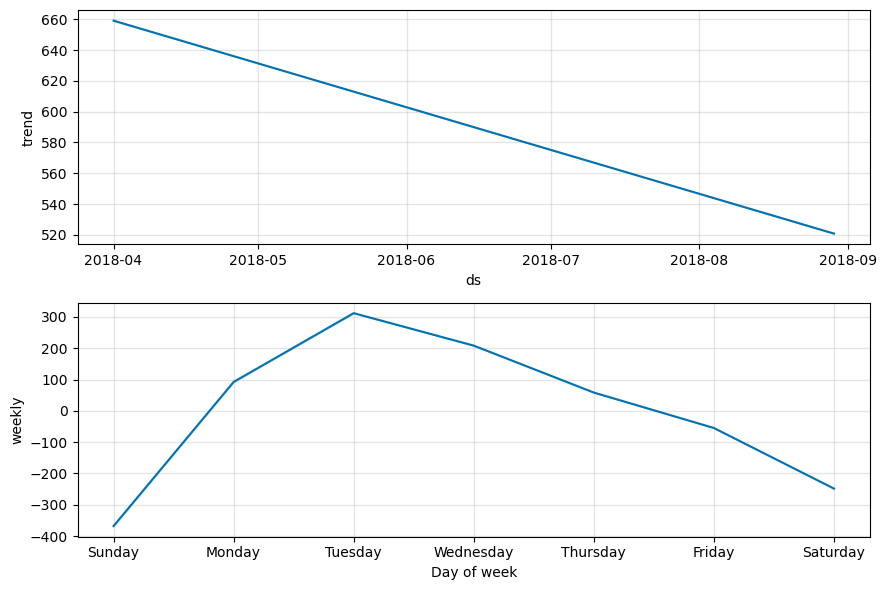

In [45]:
#pip install fbprophet 
#import plotly.express as px
fig2 =model.plot_components(forecast)


In [47]:
# Based on historical data we will calculate performance metrics
actual =prophet_data['y'].values
predicted = forecast.loc[forecast['ds'].isin(prophet_data['ds']),'yhat'].values

In [49]:
mae = mean_absolute_error(actual , predicted)

In [51]:
mse =mean_squared_error(actual,predicted)

In [53]:
mae,mse

(56.165003421048254, 10323.652722547926)